ФБ-25 Ярош Костянтин
Лаб 4

LEVEL 1

In [338]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np

In [381]:
df = pd.read_csv("individual+household+electric+power+consumption\\household_power_consumption.txt", delimiter=';')
df

C:\Users\yaros\AppData\Local\Temp\ipykernel_14784\4197610215.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("individual+household+electric+power+consumption\\household_power_consumption.txt", delimiter=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [382]:
np_array = np.loadtxt('individual+household+electric+power+consumption\\household_power_consumption.txt', dtype=object, skiprows=1, delimiter=';')
np_array


array([['16/12/2006', '17:24:00', '4.216', ..., '0.000', '1.000',
        '17.000'],
       ['16/12/2006', '17:25:00', '5.360', ..., '0.000', '1.000',
        '16.000'],
       ['16/12/2006', '17:26:00', '5.374', ..., '0.000', '2.000',
        '17.000'],
       ...,
       ['26/11/2010', '21:00:00', '0.938', ..., '0.000', '0.000',
        '0.000'],
       ['26/11/2010', '21:01:00', '0.934', ..., '0.000', '0.000',
        '0.000'],
       ['26/11/2010', '21:02:00', '0.932', ..., '0.000', '0.000',
        '0.000']], dtype=object)

In [383]:
print(np_array)
print(df)
print(type(df['Global_active_power'][7]))

[['16/12/2006' '17:24:00' '4.216' ... '0.000' '1.000' '17.000']
 ['16/12/2006' '17:25:00' '5.360' ... '0.000' '1.000' '16.000']
 ['16/12/2006' '17:26:00' '5.374' ... '0.000' '2.000' '17.000']
 ...
 ['26/11/2010' '21:00:00' '0.938' ... '0.000' '0.000' '0.000']
 ['26/11/2010' '21:01:00' '0.934' ... '0.000' '0.000' '0.000']
 ['26/11/2010' '21:02:00' '0.932' ... '0.000' '0.000' '0.000']]
               Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                   0.0   
2075255  26/1

Так як вони у форматі str треба перевести їх у формат чисел та прибрати рядки з пропущеними даними

In [342]:
df = df.dropna()
df[df.columns.difference(['Date', 'Time'])] = df[df.columns.difference(['Date', 'Time'])].apply(pd.to_numeric)
print(df)

C:\Users\yaros\AppData\Local\Temp\ipykernel_14784\1510183705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.columns.difference(['Date', 'Time'])] = df[df.columns.difference(['Date', 'Time'])].apply(pd.to_numeric)


               Date      Time  Global_active_power  Global_reactive_power  \
0        16/12/2006  17:24:00                4.216                  0.418   
1        16/12/2006  17:25:00                5.360                  0.436   
2        16/12/2006  17:26:00                5.374                  0.498   
3        16/12/2006  17:27:00                5.388                  0.502   
4        16/12/2006  17:28:00                3.666                  0.528   
...             ...       ...                  ...                    ...   
2075254  26/11/2010  20:58:00                0.946                  0.000   
2075255  26/11/2010  20:59:00                0.944                  0.000   
2075256  26/11/2010  21:00:00                0.938                  0.000   
2075257  26/11/2010  21:01:00                0.934                  0.000   
2075258  26/11/2010  21:02:00                0.932                  0.000   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
0    

In [343]:

np_array = np_array[np.all(np_array != '?', axis=1)]
np_array[:, 2:] = np_array[:, 2:].astype(float)
print(len(np_array))
print(type(np_array[0][3]))

2049280
<class 'float'>


Обрати всі домогосподарства, у яких загальна активна споживана
потужність перевищує 5 кВт.

In [344]:
print(df[df['Global_active_power'] > 5])

               Date      Time  Global_active_power  Global_reactive_power  \
1        16/12/2006  17:25:00                5.360                  0.436   
2        16/12/2006  17:26:00                5.374                  0.498   
3        16/12/2006  17:27:00                5.388                  0.502   
11       16/12/2006  17:35:00                5.412                  0.470   
12       16/12/2006  17:36:00                5.224                  0.478   
...             ...       ...                  ...                    ...   
2069356  22/11/2010  18:40:00                5.408                  0.150   
2069357  22/11/2010  18:41:00                5.528                  0.144   
2071586  24/11/2010  07:50:00                5.172                  0.050   
2071587  24/11/2010  07:51:00                5.750                  0.000   
2072997  25/11/2010  07:21:00                5.074                  0.240   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
1    

In [345]:
print(np_array[np_array[:, 2] > 5])

[['16/12/2006' '17:25:00' 5.36 ... 0.0 1.0 16.0]
 ['16/12/2006' '17:26:00' 5.374 ... 0.0 2.0 17.0]
 ['16/12/2006' '17:27:00' 5.388 ... 0.0 1.0 17.0]
 ...
 ['24/11/2010' '07:50:00' 5.172 ... 0.0 38.0 17.0]
 ['24/11/2010' '07:51:00' 5.75 ... 0.0 39.0 17.0]
 ['25/11/2010' '07:21:00' 5.074 ... 1.0 2.0 18.0]]


Обрати всі домогосподарства, у яких вольтаж перевищую 235 В.

In [346]:
print(df[df['Voltage'] >  235])

               Date      Time  Global_active_power  Global_reactive_power  \
4        16/12/2006  17:28:00                3.666                  0.528   
5        16/12/2006  17:29:00                3.520                  0.522   
6        16/12/2006  17:30:00                3.702                  0.520   
7        16/12/2006  17:31:00                3.700                  0.520   
14       16/12/2006  17:38:00                4.054                  0.422   
...             ...       ...                  ...                    ...   
2075254  26/11/2010  20:58:00                0.946                  0.000   
2075255  26/11/2010  20:59:00                0.944                  0.000   
2075256  26/11/2010  21:00:00                0.938                  0.000   
2075257  26/11/2010  21:01:00                0.934                  0.000   
2075258  26/11/2010  21:02:00                0.932                  0.000   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
4    

In [347]:
print(np_array[np_array[:, 4] > 235])

[['16/12/2006' '17:28:00' 3.666 ... 0.0 1.0 17.0]
 ['16/12/2006' '17:29:00' 3.52 ... 0.0 2.0 17.0]
 ['16/12/2006' '17:30:00' 3.702 ... 0.0 1.0 17.0]
 ...
 ['26/11/2010' '21:00:00' 0.938 ... 0.0 0.0 0.0]
 ['26/11/2010' '21:01:00' 0.934 ... 0.0 0.0 0.0]
 ['26/11/2010' '21:02:00' 0.932 ... 0.0 0.0 0.0]]


Обрати всі домогосподарства, у яких сила струму лежить в межах
19-20 А, для них виявити ті, у яких пральна машина та холодильних
споживають більше, ніж бойлер та кондиціонер.

In [348]:
print(df[(df['Global_intensity'].between(19, 20)) & (df['Sub_metering_2'] > df['Sub_metering_3'])])

               Date      Time  Global_active_power  Global_reactive_power  \
45       16/12/2006  18:09:00                4.464                  0.136   
460      17/12/2006  01:04:00                4.582                  0.258   
464      17/12/2006  01:08:00                4.618                  0.104   
475      17/12/2006  01:19:00                4.636                  0.140   
476      17/12/2006  01:20:00                4.634                  0.152   
...             ...       ...                  ...                    ...   
2071589  24/11/2010  07:53:00                4.666                  0.000   
2071590  24/11/2010  07:54:00                4.694                  0.000   
2071591  24/11/2010  07:55:00                4.602                  0.000   
2071592  24/11/2010  07:56:00                4.536                  0.000   
2071593  24/11/2010  07:57:00                4.626                  0.000   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
45   

In [349]:
print(np_array[(np_array[:, 5] >= 19) & (np_array[:, 5] <= 20) & (np_array[:, 7] > np_array[:, 8])])

[['16/12/2006' '18:09:00' 4.464 ... 0.0 37.0 16.0]
 ['17/12/2006' '01:04:00' 4.582 ... 0.0 13.0 0.0]
 ['17/12/2006' '01:08:00' 4.618 ... 0.0 27.0 0.0]
 ...
 ['24/11/2010' '07:55:00' 4.602 ... 0.0 40.0 17.0]
 ['24/11/2010' '07:56:00' 4.536 ... 0.0 39.0 17.0]
 ['24/11/2010' '07:57:00' 4.626 ... 0.0 39.0 17.0]]


Обрати випадковим чином 500000 домогосподарств (без повторів
елементів вибірки), для них обчислити середні величини усіх 3-х
груп споживання електричної енергії, а також

In [350]:

sampled_df = df.sample(n=500000)
print(sampled_df['Sub_metering_1'].mean())
print(sampled_df['Sub_metering_2'].mean())
print(sampled_df['Sub_metering_3'].mean())

1.123974
1.293216
6.453908


In [351]:
import numpy as np
idx = np.random.randint(len(np_array), size=500000)
sampled_np_array = np_array[idx, :]
print(sampled_np_array)
print(np.mean(sampled_np_array[:, 6]))
print(np.mean(sampled_np_array[:, 7]))
print(np.mean(sampled_np_array[:, 8]))

[['19/6/2009' '00:42:00' 0.164 ... 0.0 0.0 0.0]
 ['5/5/2007' '00:51:00' 0.114 ... 0.0 0.0 0.0]
 ['29/8/2007' '15:07:00' 0.188 ... 0.0 0.0 0.0]
 ...
 ['20/1/2008' '04:28:00' 0.344 ... 0.0 0.0 0.0]
 ['3/9/2010' '18:58:00' 0.336 ... 0.0 0.0 1.0]
 ['7/12/2007' '02:46:00' 0.232 ... 0.0 0.0 0.0]]
1.129774
1.292858
6.456174


Обрати ті домогосподарства, які після 18-00 споживають понад 6
кВт за хвилину в середньому, серед відібраних визначити ті, у яких
основне споживання електроенергії у вказаний проміжок часу
припадає на пральну машину, сушарку, холодильник та освітлення
(група 2 є найбільшою), а потім обрати кожен третій результат із
першої половини та кожен четвертий результат із другої половини.
проте 6 це загато таких даних просто нема але можемо перевірити це для 3 кВт

In [352]:

df_filtered = df[(df['Time'].str[:2].astype(int) >= 18)]


daily_avg = df_filtered.groupby(df_filtered['Date'])['Global_active_power'].mean()
print(daily_avg)
selected_days = daily_avg[daily_avg > 6]
print(selected_days)
selected_days = daily_avg[daily_avg > 3]
print(selected_days)

Date
1/1/2007     0.655689
1/1/2008     2.197972
1/1/2009     2.122194
1/1/2010     0.463028
1/10/2007    1.893467
               ...   
9/8/2010     0.298461
9/9/2007     2.032689
9/9/2008     0.789228
9/9/2009     1.519094
9/9/2010     1.202728
Name: Global_active_power, Length: 1428, dtype: float64
Series([], Name: Global_active_power, dtype: float64)
Date
1/12/2007     3.723044
1/4/2007      3.255072
10/11/2007    3.563822
10/2/2007     3.784972
10/2/2008     3.030411
12/1/2008     4.022328
12/4/2008     3.716856
13/1/2007     4.236961
13/10/2007    3.017556
14/11/2009    3.106850
15/11/2008    3.741500
16/1/2009     3.924511
16/2/2008     3.109989
17/11/2007    3.465767
18/1/2009     3.478444
18/10/2008    3.226572
19/2/2007     3.407506
2/2/2008      4.190183
20/1/2007     3.001394
20/12/2006    3.124622
20/2/2008     3.127217
21/1/2007     3.973400
21/11/2009    3.098283
22/11/2009    3.226211
22/12/2006    3.365689
22/12/2007    3.176750
22/2/2007     3.734531
22/2/2009     3.5

In [353]:
np_filtered = np_array[np_array[:, 1].astype('U2').astype(int) >= 18]
unique_dates = np.unique(np_filtered[:, 0])
np_daily_avgs = []
for unique in unique_dates:
    np_daily_avgs.append([unique, np.mean(np_filtered[np_filtered[:, 0] == unique][:, 2])])
np_daily_avgs = np.array(np_daily_avgs)
print(np_daily_avgs)
np_selected_days = np_daily_avgs[np_daily_avgs[:, 1].astype(float) > 6]
print(selected_days)
np_selected_days = np_daily_avgs[np_daily_avgs[:, 1].astype(float)  > 3]
print(selected_days)


[['1/1/2007' '0.6556888888888888']
 ['1/1/2008' '2.197972222222221']
 ['1/1/2009' '2.1221944444444456']
 ...
 ['9/9/2008' '0.7892277777777772']
 ['9/9/2009' '1.5190944444444447']
 ['9/9/2010' '1.202727777777778']]
Date
1/12/2007     3.723044
1/4/2007      3.255072
10/11/2007    3.563822
10/2/2007     3.784972
10/2/2008     3.030411
12/1/2008     4.022328
12/4/2008     3.716856
13/1/2007     4.236961
13/10/2007    3.017556
14/11/2009    3.106850
15/11/2008    3.741500
16/1/2009     3.924511
16/2/2008     3.109989
17/11/2007    3.465767
18/1/2009     3.478444
18/10/2008    3.226572
19/2/2007     3.407506
2/2/2008      4.190183
20/1/2007     3.001394
20/12/2006    3.124622
20/2/2008     3.127217
21/1/2007     3.973400
21/11/2009    3.098283
22/11/2009    3.226211
22/12/2006    3.365689
22/12/2007    3.176750
22/2/2007     3.734531
22/2/2009     3.575172
23/1/2010     3.332033
23/11/2008    4.418233
23/12/2006    4.226244
23/12/2007    3.098683
24/10/2008    3.100433
24/10/2009    3.168250

In [354]:
daily_avg_1 = df_filtered.groupby(df_filtered['Date'])['Sub_metering_1'].sum()
daily_avg_2 = df_filtered.groupby(df_filtered['Date'])['Sub_metering_2'].sum()
daily_avg_3 = df_filtered.groupby(df_filtered['Date'])['Sub_metering_3'].sum()
where_avg_2_bigger = daily_avg_2[(daily_avg_2 > daily_avg_1) & (daily_avg_2 > daily_avg_3)].index
print(daily_avg_2)
where_avg_2_bigger_and_active_past_18 = selected_days[(selected_days.index.isin(where_avg_2_bigger))].index
print(where_avg_2_bigger_and_active_past_18)


Date
1/1/2007       71.0
1/1/2008       56.0
1/1/2009     3662.0
1/1/2010       86.0
1/10/2007     181.0
              ...  
9/8/2010      143.0
9/9/2007     1769.0
9/9/2008       93.0
9/9/2009      160.0
9/9/2010     1412.0
Name: Sub_metering_2, Length: 1428, dtype: float64
Index(['22/2/2009', '4/3/2007', '5/3/2007', '5/3/2008'], dtype='object', name='Date')


In [355]:
np_daily_avg_1 = []
for unique in unique_dates:
    np_daily_avg_1.append([unique, np.sum(np_filtered[np_filtered[:, 0] == unique][:, 6])])
np_daily_avg_1 = np.array(np_daily_avg_1)

np_daily_avg_2 = []
for unique in unique_dates:
    np_daily_avg_2.append([unique, np.sum(np_filtered[np_filtered[:, 0] == unique][:, 7])])
np_daily_avg_2 = np.array(np_daily_avg_2)

np_daily_avg_3 = []
for unique in unique_dates:
    np_daily_avg_3.append([unique, np.sum(np_filtered[np_filtered[:, 0] == unique][:, 8])])
np_daily_avg_3 = np.array(np_daily_avg_3)

np_where_avg_2_bigger = np_daily_avg_2[(np_daily_avg_2[:, 1].astype(float) > np_daily_avg_1[:, 1].astype(float)) & (np_daily_avg_2[:, 1].astype(float) > np_daily_avg_3[:, 1].astype(float))][:, 0]

np_where_avg_2_bigger_and_active_past_18 = np_selected_days[np.isin(np_selected_days[:, 0], np_where_avg_2_bigger)][:, 0] 
print(np_where_avg_2_bigger_and_active_past_18)

['22/2/2009' '4/3/2007' '5/3/2007' '5/3/2008']


Підянимо інформацію з основної таблички

In [356]:
full_where_avg_2_bigger_and_active_past_18 = df_filtered[df_filtered['Date'].isin(where_avg_2_bigger_and_active_past_18)]
print(full_where_avg_2_bigger_and_active_past_18)

              Date      Time  Global_active_power  Global_reactive_power  \
112356    4/3/2007  18:00:00                4.816                  0.420   
112357    4/3/2007  18:01:00                3.702                  0.450   
112358    4/3/2007  18:02:00                4.544                  0.414   
112359    4/3/2007  18:03:00                4.516                  0.434   
112360    4/3/2007  18:04:00                3.712                  0.432   
...            ...       ...                  ...                    ...   
1150951  22/2/2009  23:55:00                1.800                  0.096   
1150952  22/2/2009  23:56:00                1.864                  0.150   
1150953  22/2/2009  23:57:00                1.866                  0.200   
1150954  22/2/2009  23:58:00                1.884                  0.206   
1150955  22/2/2009  23:59:00                1.866                  0.200   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
112356    237.12 

In [357]:
np_full_where_avg_2_bigger_and_active_past_18 = np_filtered[np.isin(np_filtered[:, 0], np_where_avg_2_bigger_and_active_past_18)]
print(np_full_where_avg_2_bigger_and_active_past_18)

[['4/3/2007' '18:00:00' 4.816 ... 0.0 36.0 17.0]
 ['4/3/2007' '18:01:00' 3.702 ... 1.0 19.0 17.0]
 ['4/3/2007' '18:02:00' 4.544 ... 0.0 30.0 17.0]
 ...
 ['22/2/2009' '23:57:00' 1.866 ... 0.0 0.0 0.0]
 ['22/2/2009' '23:58:00' 1.884 ... 0.0 0.0 0.0]
 ['22/2/2009' '23:59:00' 1.866 ... 0.0 0.0 0.0]]


In [358]:
half_point = len(full_where_avg_2_bigger_and_active_past_18) // 2
first_half = full_where_avg_2_bigger_and_active_past_18.iloc[:half_point]
second_half = full_where_avg_2_bigger_and_active_past_18.iloc[half_point:]


selected_first_half = first_half.iloc[::3]

selected_second_half = second_half.iloc[::4]

selected_df = pd.concat([selected_first_half, selected_second_half])

print(selected_df)

              Date      Time  Global_active_power  Global_reactive_power  \
112356    4/3/2007  18:00:00                4.816                  0.420   
112359    4/3/2007  18:03:00                4.516                  0.434   
112362    4/3/2007  18:06:00                3.820                  0.416   
112365    4/3/2007  18:09:00                3.642                  0.318   
112368    4/3/2007  18:12:00                4.302                  0.148   
...            ...       ...                  ...                    ...   
1150936  22/2/2009  23:40:00                2.910                  0.000   
1150940  22/2/2009  23:44:00                2.710                  0.074   
1150944  22/2/2009  23:48:00                1.814                  0.048   
1150948  22/2/2009  23:52:00                1.850                  0.104   
1150952  22/2/2009  23:56:00                1.864                  0.150   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
112356    237.12 

In [359]:
np_half_point = len(np_full_where_avg_2_bigger_and_active_past_18) // 2
np_first_half = np_full_where_avg_2_bigger_and_active_past_18[:np_half_point]
np_second_half = np_full_where_avg_2_bigger_and_active_past_18[np_half_point:]


np_selected_first_half = np_first_half[::3]

np_selected_second_half = np_second_half[::4]
np_selected_df = np.concatenate((np_selected_first_half , np_selected_second_half))

print(np_selected_df)

[['4/3/2007' '18:00:00' 4.816 ... 0.0 36.0 17.0]
 ['4/3/2007' '18:03:00' 4.516 ... 1.0 33.0 18.0]
 ['4/3/2007' '18:06:00' 3.82 ... 0.0 22.0 17.0]
 ...
 ['22/2/2009' '23:48:00' 1.814 ... 0.0 0.0 0.0]
 ['22/2/2009' '23:52:00' 1.85 ... 0.0 0.0 0.0]
 ['22/2/2009' '23:56:00' 1.864 ... 0.0 1.0 0.0]]



LEVEL 2

Використаний дата сет:

Donated on 7/6/1993
Revised from CMU StatLib library, data concerns city-cycle fuel consumption

Dataset Characteristics
Multivariate

Feature Type
Real, Categorical, Integer

Instances
398


Так як при скачуванні з ucimlrepo одразу качаються pandas dataframe тому і почнемо ми з них.

In [360]:
import pandas as pd
import numpy as np


In [361]:
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
df = pd.read_csv("auto+mpg\\auto-mpg.data-original.txt", delimiter='\s+', header=None, names=column_names)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [362]:
np_array = df.values
np_array

array([[18.0, 8.0, 307.0, ..., 70.0, 1.0, 'chevrolet chevelle malibu'],
       [15.0, 8.0, 350.0, ..., 70.0, 1.0, 'buick skylark 320'],
       [18.0, 8.0, 318.0, ..., 70.0, 1.0, 'plymouth satellite'],
       ...,
       [32.0, 4.0, 135.0, ..., 82.0, 1.0, 'dodge rampage'],
       [28.0, 4.0, 120.0, ..., 82.0, 1.0, 'ford ranger'],
       [31.0, 4.0, 119.0, ..., 82.0, 1.0, 'chevy s-10']], dtype=object)

In [363]:
print(df.isnull().sum())
print(df[df.isna().any(axis=1)])

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
10    NaN        4.0         133.0       115.0  3090.0          17.5   
11    NaN        8.0         350.0       165.0  4142.0          11.5   
12    NaN        8.0         351.0       153.0  4034.0          11.0   
13    NaN        8.0         383.0       175.0  4166.0          10.5   
14    NaN        8.0         360.0       175.0  3850.0          11.0   
17    NaN        8.0         302.0       140.0  3353.0           8.0   
38   25.0        4.0          98.0         NaN  2046.0          19.0   
39    NaN        4.0          97.0        48.0  1978.0          20.0   
133  21.0        6.0         200.0         NaN  2875.0          17.0   
337  40.9        4.0          85.0         NaN  1835.0          17.3   
343  23.6        4.0         140.

Як бачимо є пропущені дані у horsepower

In [364]:
print(len(df))
df = df.dropna(axis=0)
print(len(df))
print(df.isnull().sum())

406
392
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


In [365]:

temp = np_array

print(len(np_array))
np_array = np_array[~pd.isna(np_array).any(axis=1)] #np.isnan doesnt work for object lists and we have ibject list cuz of first column
print(len(np_array))


406
392


Тепер пропущених даних нема

In [366]:
def normalize(dataset):
    # Проводимо нормалізацію
    min_vals = dataset.min(axis=0)
    max_vals = dataset.max(axis=0)
    normalized = (dataset - min_vals) / (max_vals - min_vals)
    return normalized
normalized_df = df
normalized_df[df.columns.difference(['car_name'])] = normalize(df[df.columns.difference(['car_name'])])
normalized_df

C:\Users\yaros\AppData\Local\Temp\ipykernel_14784\3154077841.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_df[df.columns.difference(['car_name'])] = normalize(df[df.columns.difference(['car_name'])])


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,chevrolet chevelle malibu
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,buick skylark 320
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,plymouth satellite
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,amc rebel sst
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,ford mustang gl
402,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,0.5,vw pickup
403,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,dodge rampage
404,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,ford ranger


In [367]:
def np_normalize(dataset):
    min_vals = dataset.min(axis=0)
    max_vals = dataset.max(axis=0)
    print(min_vals, max_vals)
    normalized = (dataset - min_vals) / (max_vals - min_vals)
    return normalized
normalized_np = np_array
normalized_np[:, :-1:] = np_normalize(normalized_np[:, :-1])
print(normalized_np)

[9.0 3.0 68.0 46.0 1613.0 8.0 70.0 1.0] [46.6 8.0 455.0 230.0 5140.0 24.8 82.0 3.0]
[[0.23936170212765956 1.0 0.6175710594315246 ... 0.0 0.0
  'chevrolet chevelle malibu']
 [0.15957446808510636 1.0 0.7286821705426356 ... 0.0 0.0
  'buick skylark 320']
 [0.23936170212765956 1.0 0.6459948320413437 ... 0.0 0.0
  'plymouth satellite']
 ...
 [0.6117021276595744 0.2 0.1731266149870801 ... 1.0 0.0 'dodge rampage']
 [0.5053191489361702 0.2 0.1343669250645995 ... 1.0 0.0 'ford ranger']
 [0.5851063829787234 0.2 0.13178294573643412 ... 1.0 0.0 'chevy s-10']]


Нормалізація успішна!

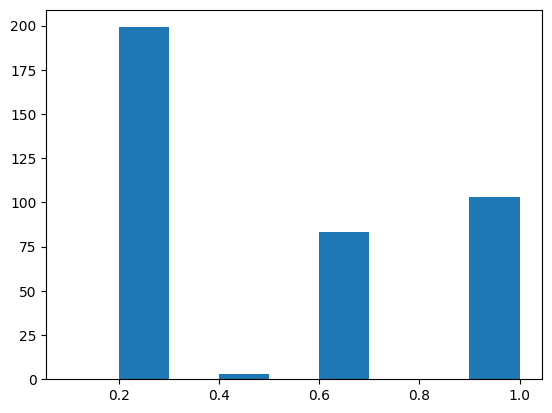

In [368]:
import matplotlib.pyplot as plt
custom_bins = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
plt.hist(normalized_df['cylinders'], bins=custom_bins)
plt.show()

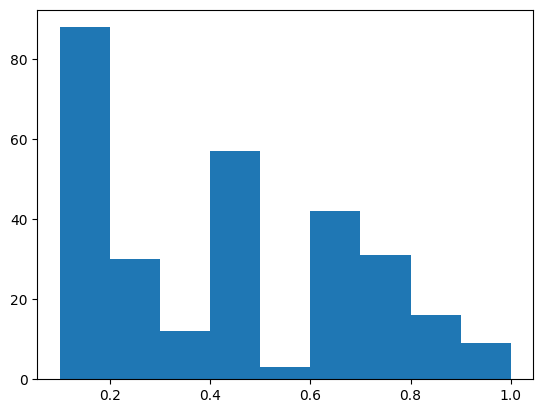

In [369]:
plt.hist(normalized_np[:, 2], bins=custom_bins)
plt.show()

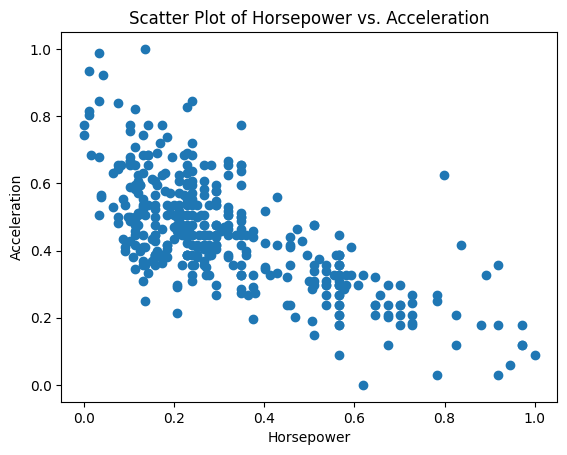

In [370]:

plt.scatter(data=df, x='horsepower', y='acceleration')
plt.xlabel('Horsepower')
plt.ylabel('Acceleration')
plt.title('Scatter Plot of Horsepower vs. Acceleration')
plt.show()

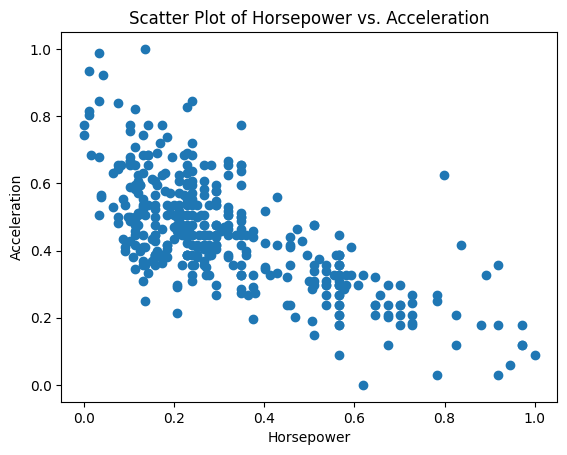

In [371]:
plt.scatter(x=normalized_np[:, 3], y=normalized_np[:, 5])
plt.xlabel('Horsepower')
plt.ylabel('Acceleration')
plt.title('Scatter Plot of Horsepower vs. Acceleration')
plt.show()

In [372]:
import random
possible_values = ['A', 'B', 'C']

df['Letters'] = [random.choice(possible_values) for _ in range(len(df))]


encoded_df = pd.get_dummies(df['Letters'])

df_encoded = pd.concat([df, encoded_df], axis=1)

print(df_encoded)

          mpg  cylinders  displacement  horsepower    weight  acceleration  \
0    0.239362        1.0      0.617571    0.456522  0.536150      0.238095   
1    0.159574        1.0      0.728682    0.646739  0.589736      0.208333   
2    0.239362        1.0      0.645995    0.565217  0.516870      0.178571   
3    0.186170        1.0      0.609819    0.565217  0.516019      0.238095   
4    0.212766        1.0      0.604651    0.510870  0.520556      0.148810   
..        ...        ...           ...         ...       ...           ...   
401  0.478723        0.2      0.186047    0.217391  0.333711      0.452381   
402  0.930851        0.2      0.074935    0.032609  0.146583      0.988095   
403  0.611702        0.2      0.173127    0.206522  0.193365      0.214286   
404  0.505319        0.2      0.134367    0.179348  0.286929      0.630952   
405  0.585106        0.2      0.131783    0.195652  0.313864      0.678571   

     model_year  origin                   car_name Letters  A  

C:\Users\yaros\AppData\Local\Temp\ipykernel_14784\3951052346.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Letters'] = [random.choice(possible_values) for _ in range(len(df))]


In [373]:


np_array = np.concatenate((np_array, np.array([random.choice(possible_values) for _ in range(len(np_array))]).reshape(-1, 1)), axis=1)


categories, inverse  = np.unique(np_array[:, 8], return_inverse=True)

one_hot = np.zeros((np_array[:, 8].size, categories.size))
one_hot[np.arange(np_array[:, 8].size), inverse] = 1
np_array = np.concatenate((np_array, one_hot), axis=1)
print(np_array)

[[0.23936170212765956 1.0 0.6175710594315246 ... 0.0 0.0 0.0]
 [0.15957446808510636 1.0 0.7286821705426356 ... 0.0 0.0 0.0]
 [0.23936170212765956 1.0 0.6459948320413437 ... 0.0 0.0 0.0]
 ...
 [0.6117021276595744 0.2 0.1731266149870801 ... 0.0 0.0 0.0]
 [0.5053191489361702 0.2 0.1343669250645995 ... 0.0 0.0 0.0]
 [0.5851063829787234 0.2 0.13178294573643412 ... 0.0 0.0 0.0]]


Провести візуалізацію багатовимірних даних, використовуючи

приклади, наведені у медіумі

Text(0.5, 0, 'weight')

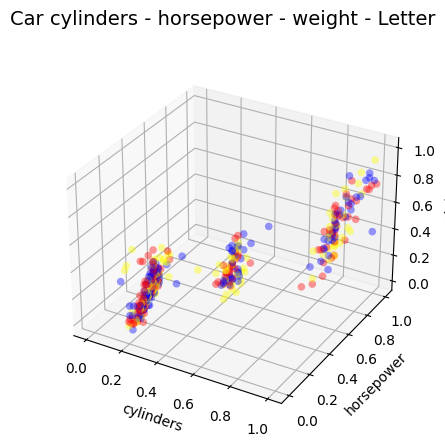

In [374]:
fig = plt.figure()
t = fig.suptitle('Car cylinders - horsepower - weight - Letter', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(df['cylinders'])
ys = list(df['horsepower'])
zs = list(df['weight'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if ct == 'A' else 'blue' if ct == 'B' else 'yellow' for ct in df['Letters']]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)

ax.set_xlabel('cylinders')
ax.set_ylabel('horsepower')
ax.set_zlabel('weight')

Text(0.5, 0, 'weight')

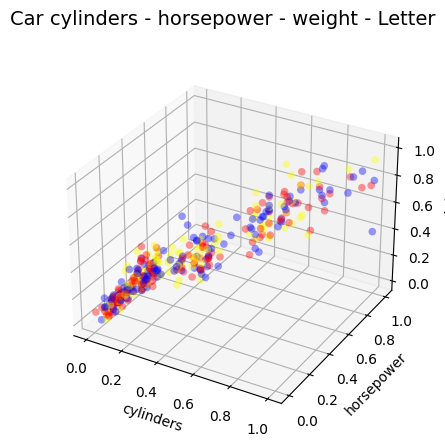

In [375]:
fig = plt.figure()
t = fig.suptitle('Car cylinders - horsepower - weight - Letter', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(np_array[:, 2])
ys = list(np_array[:, 3])
zs = list(np_array[:, 4])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if ct == 'A' else 'blue' if ct == 'B' else 'yellow' for ct in df['Letters']]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)

ax.set_xlabel('cylinders')
ax.set_ylabel('horsepower')
ax.set_zlabel('weight')

Поділити випадковим чином датасет на дві рівні частини. Навчити 3
регресійні моделі на основі не менше одного атрибуту відновлювати
інший. Навчання має відбуватися на основі першого датасету (https://
scikit-learn.org/stable/modules/linear_model.html), візуалізувати моделі
та на основі середньої квадратичної помилки (https://scikit-learn.org/
stable/modules/generated/sklearn.metrics.mean_squared_error.html)
вибрати найкращу.

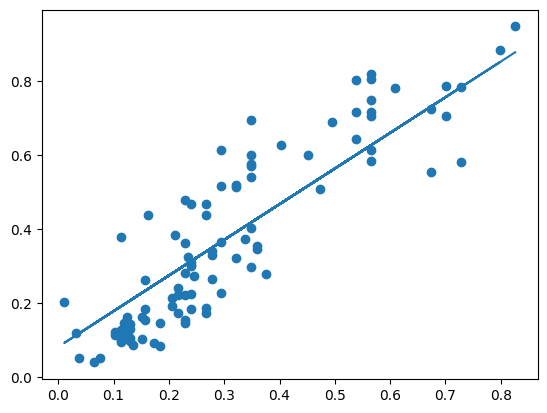

{LinearRegression(): 0.012718883595592758}


In [376]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


x_train, x_test, y_train, y_test = train_test_split(df[['horsepower']], df['weight'])

lr = linear_model.LinearRegression()
train_errors = {}
lr.fit(x_train, y_train)
prediction = lr.predict(x_test)
train_errors[lr] = mean_squared_error(y_test, prediction)
plt.plot(x_test, prediction)
plt.scatter(x_test, y_test)
plt.show()
print(train_errors)

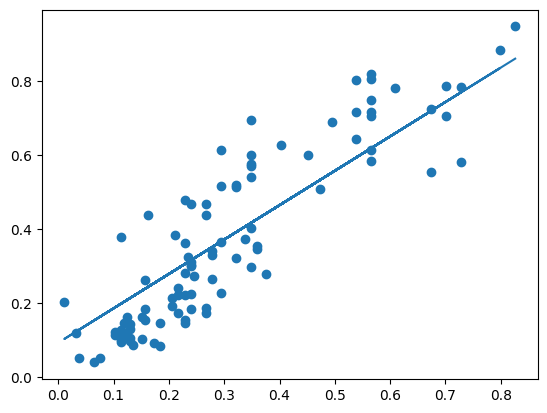

{LinearRegression(): 0.012718883595592758, Ridge(alpha=0.5): 0.013162078139763498}


In [377]:

rd = linear_model.Ridge(alpha=.5)
rd.fit(x_train, y_train)
prediction = rd.predict(x_test)
train_errors[rd] = mean_squared_error(y_test, prediction)
plt.plot(x_test, prediction)
plt.scatter(x_test, y_test)
plt.show()
print(train_errors)

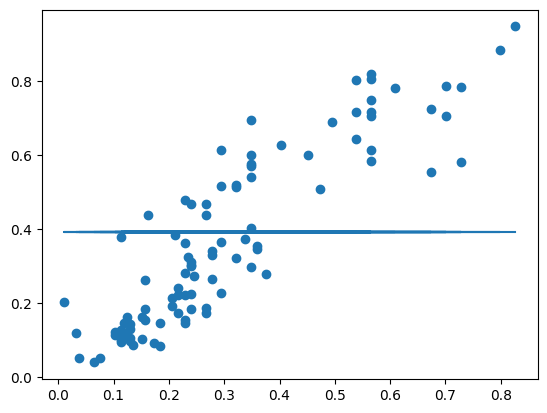

{LinearRegression(): 0.012718883595592758, Ridge(alpha=0.5): 0.013162078139763498, Lasso(alpha=0.1): 0.057410956559464106}


In [378]:
lo = linear_model.Lasso(alpha=0.1)
lo.fit(x_train, y_train)
prediction = lo.predict(x_test)
train_errors[lo] = mean_squared_error(y_test, prediction)
plt.plot(x_test, prediction)
plt.scatter(x_test, y_test)
plt.show()
print(train_errors)

In [379]:
print(min(train_errors, key=lambda k: train_errors[k]))

LinearRegression()
